Voitsikhovska Lena | IV Amazinum Data Science Camp

In [67]:
import random
import time
import matplotlib.pyplot as plt

Завдання 1: Написати програму розв’язування систем 3 лінійних рівнянь з 3 невідомими, та вказати
розв’язок X системи AX= B, де

In [68]:
A = [[1, 2, 3],
     [0, 1, 2],
     [2, 0, 0]]

b = [1, 1, 0]

n = len(b)

for i in range(n):
    max_row = i
    for k in range(i + 1, n):
        if abs(A[k][i]) > abs(A[max_row][i]):
            max_row = k

    A[i], A[max_row] = A[max_row], A[i]
    b[i], b[max_row] = b[max_row], b[i]

    pivot = A[i][i]
    for j in range(i, n):
        A[i][j] /= pivot
    b[i] /= pivot

    for k in range(i + 1, n):
        factor = A[k][i]
        for j in range(i, n):
            A[k][j] -= factor * A[i][j]
        b[k] -= factor * b[i]

x = [0] * n
for i in range(n - 1, -1, -1):
    x[i] = b[i]
    for j in range(i + 1, n):
        x[i] -= A[i][j] * x[j]

print("Результати:")
for i in range(n):
    print("x[{}] = {}".format(i, x[i]))


Результати:
x[0] = 0.0
x[1] = -1.0
x[2] = 1.0


Завдання 2: Написати програму, котра приймає на вхід матрицю зі значеннями 1 або 0 (живий або
мертвий стани) та ітеративно замінює значення в матриці за наступними правилами:
● якщо в живої клітини два чи три живих сусіди, то вона лишається жити;
● якщо в живої клітини один чи немає живих сусідів, то вона помирає від «самотності»;
● якщо в живої клітини чотири та більше живих сусідів, то вона помирає від «перенаселення»;
● якщо в мертвої клітини рівно три живих сусіди, то вона оживає.
Кожна клітинка має вісім сусідів.

In [69]:
def count_neighbors(board, x, y):
    # кількість живих сусідів для заданої клітинки (x, y)
    count = 0
    rows, cols = len(board), len(board[0])

    # Список зі зміщеннями до сусідніх клітинок
    offsets = [(-1, -1), (-1, 0), (-1, 1),
               (0, -1),           (0, 1),
               (1, -1), (1, 0), (1, 1)]

    for dx, dy in offsets:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and board[nx][ny] == 1:
            count += 1
    return count

def update_board(board):
    new_board = [row[:] for row in board]
    rows, cols = len(board), len(board[0])

    for x in range(rows):
        for y in range(cols):
            cell = board[x][y]
            neighbors = count_neighbors(board, x, y)

            if cell == 1:
                if neighbors < 2 or neighbors > 3:
                    new_board[x][y] = 0
            else:
                if neighbors == 3:
                    new_board[x][y] = 1

    return new_board

# Приклад вхідної матриці (0 - мертва клітинка, 1 - жива клітинка)
initial_board = [[1,0,0,0,0,0,0],
                  [0,0,1,0,0,1,1],
                  [1,0,0,1,0,0,1],
                  [0,1,1,0,1,1,0],
                  [1,1,1,1,0,0,1],
                  [1,1,1,1,1,1,1],
                  [1,1,0,1,1,0,1]]

# Кількість ітерацій (поколінь)
iterations = 7

# Виконуємо ітеративне оновлення та виводимо результати
for generation in range(iterations):
    initial_board = update_board(initial_board)

for row in initial_board:
      print(row)


[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]


Завдання 2.1*: Модифікувати програму так, щоб вона випадково генерувала початковий стан матриці з
заданим розміром і мала можливість безкінечно симулювати ітерації.

In [70]:
dimension = int(input(f"Вкажіть розмірність матриці: "))
print(f'Генеруємо матрицю розмірністю {dimension}')

def generate_boolean_matrix(dimension):
    matrix = []
    for _ in range(dimension):
        row = [random.choice([0, 1]) for _ in range(dimension)]
        matrix.append(row)
    return matrix

boolean_matrix = generate_boolean_matrix(dimension)

# Виводимо матрицю на екран
for row in boolean_matrix:
    print(row)

print()
def print_matrix(matrix):
    for row in matrix:
      print(row)
    print()

def update_and_show_matrix (visualize_board, m):
  iterations = True

  while(iterations):
    m = update_board(m)
    time.sleep(3)
    visualize_board(m)
update_and_show_matrix(print_matrix, boolean_matrix)



Вкажіть розмірність матриці: 7
Генеруємо матрицю розмірністю 7
[1, 1, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 0]

[1, 1, 1, 1, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 1]
[0, 1, 0, 1, 0, 1, 0]

[1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 1, 1]



KeyboardInterrupt: ignored

Завдання 2.2**: Візуалізувати симуляцію ітерацій (matplotlib / seaborn / plotly / etc).

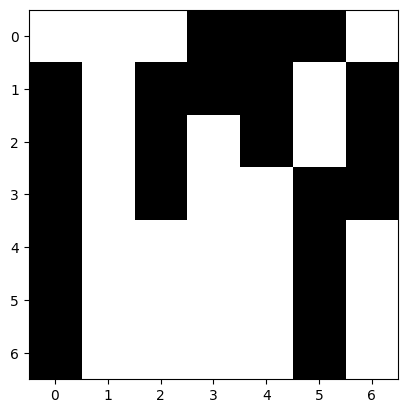

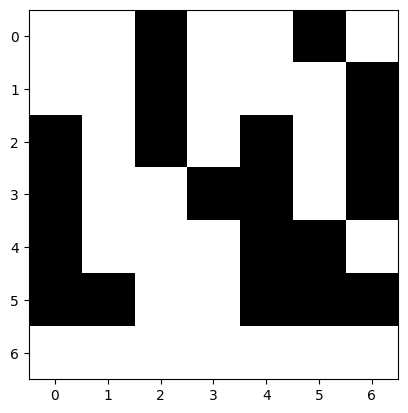

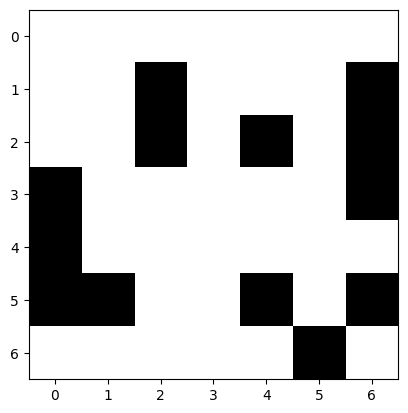

KeyboardInterrupt: ignored

In [71]:
def visualize_board(board):
    # Візуалізація стану матриці
    plt.imshow(board, cmap='binary')
    plt.show()

matrix = generate_boolean_matrix(7)
update_and_show_matrix(visualize_board, matrix)

Завдання 3: Ймовірність випадання сторони ‘H’ для кожної з 5 монет (назвемо їх m1, m2, m3, m4, m5) зі
зміщеним центром ваги рівна відповідно [0.1, 0.2, 0.4, 0.8, 0.9]. З монет навмання вибрали одну і почали
випробування. Визначити ймовірність випадання ‘H в наступному випробуванні після кожного з 8
фактично проведених випробувань:
[H H H T H T H H] (тут ‘T’ протилежна сторона монети).
Наприклад, до першого випробування ймовірність випадання ‘H’ рівна ~0.48 (за формулою повної
ймовірності, з урахуванням рівноможливості вибрати кожну монету з наявних). Після випадання ‘H’ в
першому випробуванні, ймовірності гіпотез, що вибрана монета є m1/m2/m3 зменшились, а відповідно
ймовірності гіпотез, що вибрана монета m4/m5 збільшились а, отже і змінилась ймовірність випадання ‘H’
в наступному (другому) випробуванні і стала рівною ~0.69. Аналогічно після випадання ‘H’ в другому
випробування треба переоцінити ймовірність випадання ‘H’ в третьому, і т.д.

In [72]:
# Оголошуємо список подій, наданий в умові
events = [1, 1, 1, 0, 1, 0, 1, 1]

# список ймовірностей випадіння сторони Н для кожної з 5-ти монет
probabilities = [0.1, 0.2, 0.4, 0.8, 0.9]

# список ймовірності, що підкидають монету mn
coin_prob = [0.2, 0.2, 0.2, 0.2, 0.2]

# функція пошуку загальної ймовірності події
def general_probability (probabilities, coin_prob):
  sum = 0
  for i in range(len(coin_prob)):
    sum += probabilities[i] * coin_prob[i]
  return sum

# функція обчислення ймовірностей гіпотез (за теоремою Баєса)
def Bayes_prob(probabilities, coin_prob, event):
  new_coin_prob = [0, 0, 0, 0, 0] # новий масив ймовірності підкидання монет
  gen_prob = general_probability(probabilities, coin_prob)
  # якщо подія не відбулася обраховуємо загальну ймовірність зворотньої події (що випаде сторона Т)
  if not event:
    gen_prob = 1 - gen_prob
  # обчислення нових ймовірностей вибору монет
  for i in range(len(coin_prob)):
    new_coin_prob[i] = abs((not event) - probabilities[i]) * coin_prob[i] / gen_prob
    # якщо event = 0, обраховуємо ймовірність випадіння сторони Т
  return new_coin_prob


for i in events:

  coin_prob = Bayes_prob(probabilities, coin_prob, i)
  gen_prob = general_probability(probabilities, coin_prob)
  print(gen_prob)

0.6916666666666667
0.791566265060241
0.8318112633181125
0.7432579185520355
0.7974796055034701
0.688733241147117
0.7558027881316725
0.7951765079548407
